In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
# cancer

In [3]:
#### feature를 컬럼으로 DataFrame 생성
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.2, 
                                                    random_state=0)
## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)
## 학습시킴
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [5]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print(f"Training DataSet Accuracy : {forest.score(X_train, y_train):0.3f}")
print(f"Test  DataSet Accuracy : {forest.score(X_test, y_test):0.3f}")

Training DataSet Accuracy : 1.000
Test  DataSet Accuracy : 0.965


In [6]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=?
## max_depth=?

## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
forest = RandomForestClassifier(n_estimators=100,
                                max_features=5,
                                max_depth=3,
                                random_state=0)
## 학습시킴
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=5, random_state=0)

In [7]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print(f"Training DataSet Accuracy : {forest.score(X_train, y_train):0.3f}")
print(f"Test  DataSet Accuracy : {forest.score(X_test, y_test):0.3f}")

Training DataSet Accuracy : 0.974
Test  DataSet Accuracy : 0.956


### 특성 중요도 출력하기

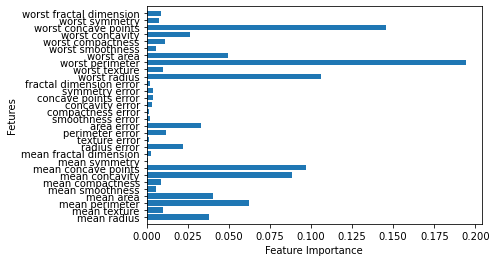

In [8]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Fetures")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

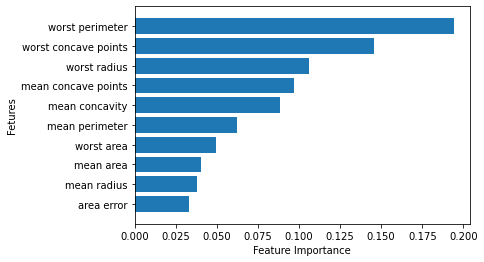

In [9]:
# 중요도 순으로 졍렬해서 시각화
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_features = 10 # 수정
    importances, features = (list(x)[-10:] for x in zip(*sorted(zip(model.feature_importances_, cancer.feature_names)))) # 추가
    plt.barh(range(n_features), importances, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Fetures")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

In [10]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
for x in [1,3,4,6,10,15]:
    ## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
    forest = RandomForestClassifier(n_estimators=100,
                                    max_features=5,
                                    max_depth=x,
                                    random_state=0)
    ## 학습시킴
    forest.fit(X_train, y_train)
    print(f"max_depth : {x}, score: {forest.score(X_test, y_test)}")

max_depth : 1, score: 0.956140350877193
max_depth : 3, score: 0.956140350877193
max_depth : 4, score: 0.9649122807017544
max_depth : 6, score: 0.9649122807017544
max_depth : 10, score: 0.9649122807017544
max_depth : 15, score: 0.9649122807017544
